In [3]:
library(dplyr)


In [4]:
library(stringr)

In [5]:
seoul <- read.csv("../Data/newSeoul2019.csv")

In [57]:
#pop <- read.table("../Data/report.txt", header = T,sep = "/", fileEncoding = "utf-8", stringsAsFactors = F)
pop <- read.table("../Data/report.txt")
head((pop),30)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
기간,자치구,세대,인구,인구,인구,인구,인구,인구,인구,인구,인구,인구밀도,인구밀도,세대당인구,65세이상고령자
기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,인구밀도,인구밀도,세대당인구,65세이상고령자
기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,인구밀도(명/㎢),면적(㎢),세대당인구,65세이상고령자
2011.1/4,합계,"4,221,613","10,581,728","5,238,674","5,343,054","10,307,783","5,107,011","5,200,772","273,945","131,663","142,282","17,397",605.21,2.44,"1,018,534"
2011.1/4,종로구,"77,380","179,068","89,119","89,949","170,099","84,910","85,189","8,969","4,209","4,760","7,421",23.91,2.2,"22,595"
2011.1/4,중구,"61,419","141,401","71,005","70,396","132,913","66,914","65,999","8,488","4,091","4,397","14,212",9.96,2.16,"17,707"
2011.1/4,용산구,"113,264","257,881","126,036","131,845","245,361","119,600","125,761","12,520","6,436","6,084","11,857",21.87,2.17,"31,231"
2011.1/4,성동구,"128,922","314,993","157,705","157,288","306,941","153,873","153,068","8,052","3,832","4,220","18,325",16.85,2.38,"32,327"
2011.1/4,광진구,"159,580","388,811","192,008","196,803","374,794","185,616","189,178","14,017","6,392","7,625","22,661",17.06,2.35,"32,580"
2011.1/4,동대문구,"158,890","380,320","190,779","189,541","367,454","185,183","182,271","12,866","5,596","7,270","26,653",14.2,2.31,"43,106"


In [ ]:
2,977,599	 10,249,679	 0.3	 2,969,184	 10,195,318	 0.3	 2,973,877	 10,143,645	 0.3	 3,013,541	 10,103,233	 0.3	 3,056,588	 10,022,181	 0.3	 3,083,007	 9,930,616	 0.3	 3,116,256	 9,857,426	 0.3	 3,124,651	 9,765,623	 0.3	 3,124,157

In [ ]:
year.sd <- aggregate(cbind(발생건수,사망자수,부상자수) ~ 년도,seoul,sd)
year.year

In [9]:
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [44]:
yeargu.mean <- aggregate(cbind(발생건수,사망자수,부상자수) ~ 년도+자치구명,seoul,mean)
yeargu.sum <-  aggregate(cbind(발생건수,사망자수,부상자수) ~ 년도+자치구명,seoul,sum)
year.mean <- aggregate(cbind(발생건수,사망자수,부상자수) ~ 년도,seoul,mean)
year.sum <- aggregate(cbind(발생건수,사망자수,부상자수) ~ 년도,seoul,sum)
head(year.mean,15)

년도,발생건수,사망자수,부상자수
2011,134.8367,1.4500000,192.0833
2012,136.0967,1.4133333,195.2767
2013,131.4633,1.2600000,189.2033
2014,135.9733,1.3333333,191.1500
2015,138.8833,1.2533333,195.5200
2016,133.4633,1.1600000,185.5633
2017,128.7500,1.1433333,179.3667
2018,129.3167,1.0133333,179.1700
2019,130.8600,0.8333333,179.6800


In [109]:
png(filename="myplot.png")
par(family = "AppleGothic")
options(warn =  -1)

# plot(yeargu.mean$년도,yeargu.mean$발생건수,col = rep(1:25, each = 9), pch = 20)
# plot(year.mean$년도,year.mean$발생건수,col = rep(1:25, each = 9), pch = 20)



barplot(year.sum$발생건수,
main = "서울시 년도별 교통사고 발생건수 ",
xlab = "년도",
ylab = "발생건수",
names = year.sum$년도,
cex.names = 0.7,
col = "gray",
ylim = c(0,50000),
legend = c(paste("최대 발생건수 :",max(year.sum$발생건수)),paste("최소 발생건수 :",min(year.sum$발생건수)))
#legend = c("legend never die")
#xlim = c(0,9.5)
#col = rainbow(nrow(GDP_ranking15))
)

dev.off()

pdf 
  2

In [110]:
png(filename="myplot2.png")
par(family = "AppleGothic")
options(warn =  -1)

barplot(year.sum$사망자수,
main = "서울시 년도별 교통사고 사망자수 ",
xlab = "년도",
ylab = "사망자수",
names = year.sum$년도,
cex.names = 0.7,
col = "gray",
ylim = c(0,500),
legend = c(paste("최대 사망자수 :",max(year.sum$사망자수)),paste("최소 사망자수 :",min(year.sum$사망자수)))
#legend = c("legend never die")
#xlim = c(0,9.5)
#col = rainbow(nrow(GDP_ranking15))
)
dev.off()

pdf 
  2

In [111]:
png(filename="myplot3.png")
par(family = "AppleGothic")
options(warn =  -1)

barplot(year.sum$부상자수,
main = "서울시 년도별 교통사고 부상자수 ",
xlab = "년도",
ylab = "부상자수",
names = year.sum$년도,
cex.names = 0.7,
col = "gray",
ylim = c(0,80000),
legend = c(paste("최대 부상자수 :",max(year.sum$부상자수)),paste("최소 부상자수 :",min(year.sum$부상자수)))
#xlim = c(0,9.5)
#col = rainbow(nrow(GDP_ranking15))
)

dev.off()

pdf 
  2

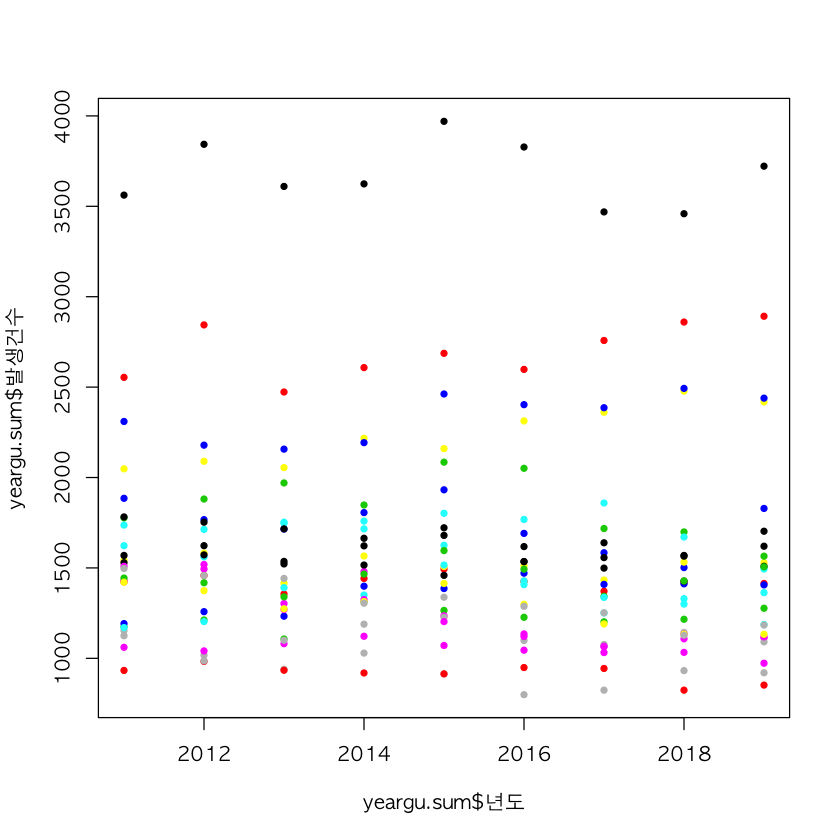

In [102]:
par(family = "AppleGothic")
options(warn =  -1)
plot(yeargu.sum$년도,yeargu.sum$발생건수,col = rep(1:25, each = 9), pch = 20)


In [107]:

cor(year.sum$발생건수, year.sum$부상자수)
cor(year.sum$발생건수, year.sum$사망자수)
cor(year.sum$부상자수, year.sum$사망자수)


[1] 0.9143289

[1] 0.6353242

[1] 0.8343025

In [ ]:
par(family = "AppleGothic")
options(warn =  -1)

barplot(year.sum$부상자수,
main = "서울시 년도별 교통사고 부상자수 ",
xlab = "년도",
ylab = "부상자수",
names = year.sum$년도,
cex.names = 0.7,
col = "gray",
ylim = c(0,80000),
legend = c(paste("최대 부상자수 :",max(year.sum$부상자수)),paste("최소 부상자수 :",min(year.sum$부상자수)))
#xlim = c(0,9.5)
#col = rainbow(nrow(GDP_ranking15))
)